In [1]:
import pandas as pd
df=pd.read_csv("/Users/zoyasyed/Downloads/Power BI/HR.csv")
df.items

<bound method DataFrame.items of       Age AgeGroup  Attrition     BusinessTravel  DailyRate Department  \
0      41    36-45          1      Travel Rarely       1102      Sales   
1      33    26-35          0  Travel Frequently       1392        R&D   
2      27    26-35          0      Travel Rarely        591        R&D   
3      32    26-35          0  Travel Frequently       1005        R&D   
4      30    26-35          0      Travel Rarely       1358        R&D   
...   ...      ...        ...                ...        ...        ...   
1465   55    46-55          0      Travel Rarely        189         HR   
1466   37    36-45          0      Travel Rarely        161        R&D   
1467   36    36-45          0  Travel Frequently        884        R&D   
1468   27    26-35          0      Travel Rarely        155        R&D   
1469   34    26-35          0      Travel Rarely        628        R&D   

      DistanceFromHome      Education   EducationField  EmployeeCount  ...  \


In [2]:
Attr = df[df.Attrition==1]
Attr.shape
NoAttr=df[df.Attrition==0]
NoAttr.shape

(1233, 34)

In [3]:
df.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsatCOmpany2,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,1.0,65.952149,2.145985,6832.739659,14265.779400,2.645580,15.231144,3.153285,80.0,0.845093,11.862936,2.832928,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,1.0,65.573840,1.637131,4787.092827,14559.308017,2.940928,15.097046,3.156118,80.0,0.527426,8.244726,2.624473,5.130802,2.902954,1.945148,2.852321


<AxesSubplot:xlabel='AgeGroup'>

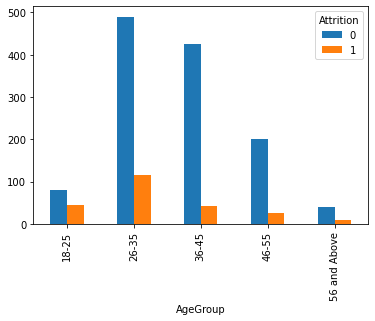

In [4]:
pd.crosstab(df.AgeGroup,df.Attrition).plot(kind='bar')

<AxesSubplot:xlabel='BusinessTravel'>

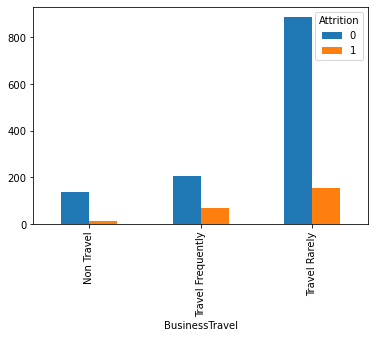

In [5]:
pd.crosstab(df.BusinessTravel,df.Attrition).plot(kind='bar')

<AxesSubplot:xlabel='JobLevel'>

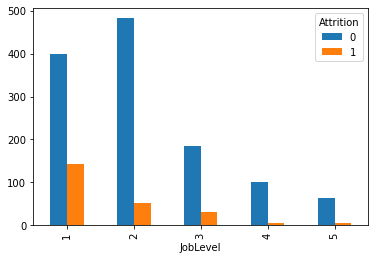

In [6]:
pd.crosstab(df.JobLevel,df.Attrition).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

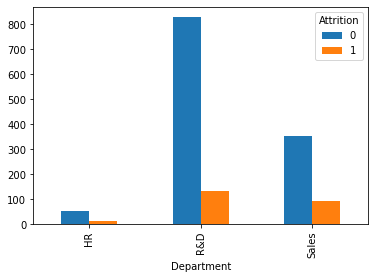

In [7]:
pd.crosstab(df.Department,df.Attrition).plot(kind='bar')

In [8]:
cols=df[['MonthlyRate','NumCompaniesWorked','DistanceFromHome','TrainingTimesLastYear','PercentSalaryHike','MonthlyIncome','PerformanceRating']]
cols.head()
#,

,MonthlyRate,NumCompaniesWorked,DistanceFromHome,TrainingTimesLastYear,PercentSalaryHike,MonthlyIncome,PerformanceRating
0,19479,8,1,0,11,5993,3
1,23159,1,3,3,11,2909,3
2,16632,9,2,3,12,3468,3
3,11864,0,2,2,13,3068,3
4,13335,1,24,2,22,2693,4


In [9]:
#salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
#df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
#df_with_dummies.head()


In [10]:
X=cols
X.head()
Y=df.Attrition


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)
X_train.shape

(1323, 7)

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

In [18]:
model.predict(X_test)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
model.score(X_test,Y_test)


0.8299319727891157

In [84]:
from sklearn import tree

In [85]:
model1=tree.DecisionTreeClassifier()

In [86]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier()

In [87]:
model1.score(X_test,Y_test)

0.7653061224489796